In [10]:
import numpy as np

# 数据
a = np.array([9.89, 8.00, 6.40, 6.17, 5.39, 7.27, 9.08, 10.40, 11.20, 8.75, 6.45, 11.90, 10.30, 9.58, 9.24, 7.75, 6.20, 8.95, 8.33])

# 1. 计算中位数
print("中位数:", np.median(a))

# 2. 计算分位数
percentiles = np.percentile(a, (75, 25, 99, 95, 90, 10, 5, 1), interpolation='midpoint')
print("分位数 (75%, 25%, 99%, 95%, 90%, 10%, 5%, 1%):", percentiles)

# 3. 极差：最大值 - 最小值
range_value = np.max(a) - np.min(a)
print("极差 (最大值 - 最小值):", range_value)

# 4. 四分位差：Q3 - Q1
Q = np.percentile(a, (75, 25), interpolation='midpoint')
print("四分位差 (Q3 - Q1):", Q[0] - Q[1])

# 5. 三按值（加权平均的三分位数）
M = np.median(a)
weighted_average = 0.25 * Q[1] + 0.5 * M + 0.25 * Q[0]
print("三按值 (加权平均的三分位数):", weighted_average)


中位数: 8.75
分位数 (75%, 25%, 99%, 95%, 90%, 10%, 5%, 1%): [ 9.735  6.86  11.55  11.55  10.8    6.185  5.78   5.78 ]
极差 (最大值 - 最小值): 6.510000000000001
四分位差 (Q3 - Q1): 2.875
三按值 (加权平均的三分位数): 8.52375


In [8]:
import numpy as np
import pandas as pd

a = np.array([12.38, 12.70, 12.96, 12.87, 12.66, 12.72, 12.74, 12.77, 13.06, 19.08])

# 求均值
print(np.mean(a))

# 求标准差，ddof=1表示无偏估计
print(np.std(a, ddof=1))

# 求方差
print(np.var(a, ddof=1))

# 求变异系数
print(100 * np.std(a, ddof=1) / np.mean(a))

# 使用pandas求偏度和峰度
s = pd.Series(a)

# 求偏度
print(s.skew())

# 求峰度
print(s.kurt())


13.394
2.0062413724286623
4.025004444444442
14.978657402035704
3.1125694812469193
9.772697479534056


In [9]:
from itertools import groupby

nums2 = [25, 45, 50, 54, 55, 61, 64, 68, 72, 75, 75, 78, 79, 81, 83, 84, 84, 84, 85, 86, 86, 86, 87, 89, 89, 89, 90, 91, 91, 92, 100]

for k, g in groupby(sorted(nums2), key=lambda x: int(x) // 10):
    # 通过 int(x) % 10 获取个位数字并转换成字符串
    lst = ''.join(map(str, [int(y) % 10 for y in g]))
    print(k, '|', lst)


2 | 5
4 | 5
5 | 045
6 | 148
7 | 25589
8 | 1344456667999
9 | 0112
10 | 0


In [6]:
from itertools import groupby
nums2=[53.0,70.2,84.3,55.3,78.5,63.5,71.4,53.4,82.5,67.3,
       69.5,73.0,55.7,85.8,95.4,51.1,74.4,54.1,77.8,52.4,
       69.1,53.5,64.3,82.7,55.7,70.5,87.5,50.7,72.3,59.5]
for k, g in groupby(sorted(nums2), key=lambda x:int(x+0.5) // 10):
    lst = map(str, [int(y+0.5)% 10 for y in list(g)])
    print (k, '|',''.join(lst))

5 | 1123344566
6 | 04479
7 | 001123489
8 | 33468
9 | 5


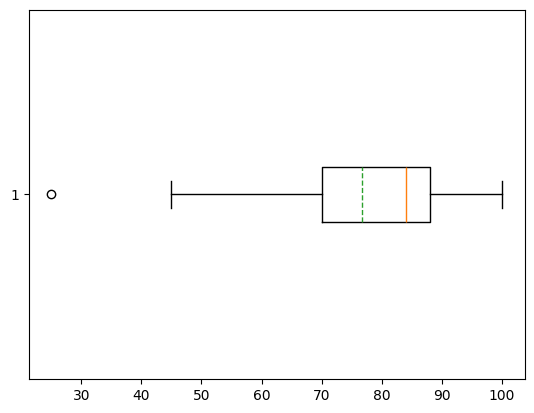

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个 Series 数据
s = pd.Series([25, 45, 50, 54, 55, 61, 64, 68, 72, 75, 75, 78, 79, 81,
               83, 84, 84, 84, 85, 86, 86, 86, 87, 89, 89, 89, 90, 91, 91, 92, 100])

# 转换为 DataFrame
df = pd.DataFrame(s)
df.columns = ['value']

# 绘制箱型图
f = plt.boxplot(df['value'], vert=False, patch_artist=False, meanline=True, showmeans=True)

# 显示箱型图
plt.show()


箱型图的组成部分：
箱体（Box）：

箱体的上下边缘分别代表 第一四分位数（Q1）和 第三四分位数（Q3）。Q1是数据的25%位置，Q3是数据的75%位置。
箱体中间的线表示 中位数（Median, Q2），即数据的50%位置。
四分位差（Interquartile Range, IQR）：

四分位差是 Q3 - Q1，代表数据中间50%分布的范围。箱体的高度反映了数据的集中度。
胡须（Whiskers）：

箱型图的两侧延伸线（胡须）通常表示数据的最大值和最小值，但排除了异常值。胡须的长度一般是从 Q1 - 1.5 * IQR 到 Q3 + 1.5 * IQR，这个范围之外的数据被认为是异常值。
异常值（Outliers）：

异常值通常以单独的点表示，它们超出了胡须的范围。异常值的定义是那些超过 Q1 - 1.5 * IQR 或 Q3 + 1.5 * IQR 的数据点。
均值线（Mean Line，若设置显示）：

均值线表示数据的 平均值，与中位数不同，平均值受极端值的影响较大。通常，箱型图默认不显示均值线，但你可以通过设置参数 showmeans=True 来显示。

In [ ]:
####9月3日漏了

In [14]:
import numpy as np
from scipy.stats import shapiro, kstest

# 假设你的数据存储在 a 这个数组中
a = np.array([9.89, 8.00, 6.40, 6.17, 5.39, 7.27, 9.08, 10.40, 11.20, 8.75, 
              6.45, 11.90, 10.30, 9.58, 9.24, 7.75, 6.20, 8.95, 8.33])

# Shapiro-Wilk 检验
stat, p = shapiro(a)
print("Shapiro-Wilk stat: %f, p-value: %f" % (stat, p))

# Kolmogorov-Smirnov 检验
stat_ks, p_ks = kstest(a, 'norm')
print("Kolmogorov-Smirnov stat: %f, p-value: %f" % (stat_ks, p_ks))


Shapiro-Wilk stat: 0.971148, p-value: 0.799170
Kolmogorov-Smirnov stat: 1.000000, p-value: 0.000000


解释输出：
Shapiro-Wilk 检验输出：
stat：Shapiro-Wilk 检验的统计量，越接近 1 表示数据越接近正态分布。
p-value：如果 p 值小于显著性水平（例如 0.05），则拒绝原假设，认为数据不符合正态分布。
Kolmogorov-Smirnov 检验输出：
stat：Kolmogorov-Smirnov 检验的统计量。该值表示样本分布与理论分布的最大差异。
p-value：与 Shapiro-Wilk 检验类似，p 值小于 0.05 时，我们拒绝原假设，认为数据不符合正态分布。
结果解读：
如果 p 值 < 0.05，我们拒绝“数据符合正态分布”的原假设。
如果 p 值 >= 0.05，我们无法拒绝原假设，即没有足够的证据证明数据不符合正态分布。
注意事项：
Shapiro-Wilk 检验 比 Kolmogorov-Smirnov 检验 更适用于小样本数据，特别是在样本量小于 50 时。
Kolmogorov-Smirnov 检验 是一个更通用的检验方法，它不仅可以检验数据是否符合正态分布，还可以用于其他分布的检验。

In [ ]:
#####

In [15]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

# 创建数据
x = np.array([67, 54, 72, 64, 39, 22, 58, 43, 46, 34])
y = np.array([24, 15, 23, 19, 16, 11, 20, 16, 17, 13])

# 皮尔逊相关系数
r_row, p_value = pearsonr(x, y)
print("Pearson's correlation coefficient:", r_row)
print("p-value:", p_value)

# 斯皮尔曼秩相关系数
rho, p_value_spearman = spearmanr(x, y)
print("Spearman's rank correlation coefficient:", rho)
print("p-value:", p_value_spearman)


Pearson's correlation coefficient: 0.920259544101804
p-value: 0.00016051579582503713
Spearman's rank correlation coefficient: 0.8997002046464955
p-value: 0.00039167359562948393


输出解读：
皮尔逊相关系数（Pearson's correlation coefficient）：

r_row：相关系数，表示两个变量之间的线性相关性。值越接近 1 或 -1，说明线性相关性越强，越接近 0 表示线性关系越弱。
p_value：p 值，用于检验相关系数是否显著。通常 p 值小于 0.05 表示相关性显著。
斯皮尔曼秩相关系数（Spearman's rank correlation coefficient）：

rho：秩相关系数，衡量变量之间的单调关系。值的范围与皮尔逊相关系数相同，接近 1 或 -1 表示强的单调关系，接近 0 表示没有单调关系。
p_value_spearman：p 值，用于检验斯皮尔曼秩相关系数的显著性。
使用场景：
皮尔逊相关系数 适用于数据之间存在线性关系的情况，要求数据的分布尽可能接近正态分布。
斯皮尔曼秩相关系数 适用于数据之间的关系是单调的（不一定是线性关系），它对异常值不敏感，适用于非正态分布的数据。

In [17]:
from scipy.stats import ranksums

a = [18,24,25,27,30,35]
b = [20,21,28,32,34,38,40]

#秩和检验
print(ranksums(a, b))

RanksumsResult(statistic=np.float64(-1.0), pvalue=np.float64(0.31731050786291415))


statistic：秩和检验的统计量，值越接近 0 表示两组数据的分布越相似。负值和正值代表不同样本组之间的关系。
pvalue：p 值，用于检验两组样本是否具有显著差异。在此例中，p 值为 0.165，表示我们不能拒绝原假设，意味着没有足够的证据表明这两组数据来自不同的分布。
解释：
如果 p 值 < 0.05，则拒绝原假设，认为两组数据有显著差异。
如果 p 值 ≥ 0.05，则不能拒绝原假设，认为两组数据之间没有显著差异。

In [ ]:
from scipy.stats import mannwhitneyu

a = [2,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,5,5,5]
b = [1,1,2,2,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,5]

# Mann-Whitney U 检验
print(mannwhitneyu(a, b, use_continuity=False, alternative='greater'))


MannwhitneyuResult(statistic=266.0, pvalue=0.026629606208391873)


 Mann-Whitney U 检验，它是一个非参数检验，用于检验两个独立样本是否来自同一分布，尤其是在数据不满足正态分布假设时。它是 秩和检验（Rank-Sum Test）的一种变体，用于比较两个独立样本的分布

mannwhitneyu 函数的参数：
a 和 b：待比较的两个独立样本。
use_continuity：默认为 True，表示是否使用连续性修正。设置为 False 时表示不使用修正。
alternative：表示假设检验的类型：
'two-sided'（默认）：双尾检验，检验两组数据是否来自同一分布。
'greater'：单尾检验，假设 a 的分布大于 b 的分布。
'less'：单尾检验，假设 a 的分布小于 b 的分布。
输出：
mannwhitneyu 函数返回两个值：

U 统计量：表示两组数据的秩和差异。U 统计量越大，说明两组数据的差异越大。
p 值：表示假设检验的显著性。如果 p 值小于 0.05（常见的显著性水平），则拒绝原假设，认为两组数据的分布有显著差异。

statistic：156.0 是 Mann-Whitney U 统计量，表示两组数据的秩和差异。
pvalue：0.040508 是 p 值，表示假设检验的显著性。因为 p 值小于 0.05，说明我们可以拒绝原假设，认为两组数据的分布有显著差异。
解读：
在这次检验中，假设你选择的是 alternative='greater'，即假设 a 的分布大于 b 的分布。如果 p 值小于 0.05（通常选择显著性水平为 0.05），则说明我们可以接受 a 的分布显著大于 b 的分布。

总结：
Mann-Whitney U 检验 是一种用于比较两个独立样本分布差异的非参数检验。
如果 p 值小于显著性水平（如 0.05），则拒绝原假设，表示两组数据存在显著差异。
该检验不要求数据符合正态分布，适用于任意分布的数据。

In [ ]:
from scipy.stats import ks_2samp

# 定义两个样本
a = [6.8, 3.1, 5.8, 4.5, 3.3, 4.7, 4.2, 4.9]
b = [4.4, 2.5, 2.8, 2.1, 6.6, 0.0, 4.8, 2.3]

# 进行 Kolmogorov-Smirnov 检验
print(ks_2samp(a, b))


KstestResult(statistic=0.625, pvalue=0.08702408702408701)


Kolmogorov-Smirnov 检验（ks_2samp），这是一个非参数检验，用于比较两个独立样本是否来自同一分布。与 Mann-Whitney U 检验 类似，Kolmogorov-Smirnov 检验是用来检验两个样本的分布是否存在显著差异，但它侧重于比较样本的累积分布函数（CDF）之间的最大差异。

ks_2samp 函数：
ks_2samp(a, b)：对两个独立样本 a 和 b 进行 Kolmogorov-Smirnov 检验，返回两个值：
D 统计量：表示两个样本的累积分布函数之间的最大差异。
p 值：表示检验的显著性。如果 p 值小于显著性水平（例如 0.05），则拒绝原假设，认为两个样本来自不同的分布。

statistic（D 统计量）：0.625，表示两个样本累积分布函数之间的最大差异。该值越大，表示差异越大。
pvalue：0.4719，表示检验的显著性。如果 p 值小于 0.05，我们可以拒绝原假设，认为两个样本来自不同的分布；如果 p 值大于 0.05，则无法拒绝原假设。

Kolmogorov-Smirnov 检验 是用来比较两个独立样本的分布差异的非参数检验。
该检验不要求数据符合正态分布，可以应用于任意分布的样本。
如果 p 值小于显著性水平，则可以拒绝原假设，认为样本分布不同。

In [ ]:
from statsmodels.stats.descriptivestats import sign_test

x=[2.8,3.9,3.1,2.9,3.3,2.6,2.9,3.4,2.9,2.9,2.7,2.6,3.0,3.3,3.4,2.7,3.1,2.8]
y=[2.5,3.1,3.3,2.6,3.1,2.8,2.7,3.2,2.7,2.7,2.5,2.9,3.4,3.0,3.2,2.9,2.8,2.4]

#计算两个相关样本的符号检验
stat, p_value = sign_test(x,y)

print(f"符号检验的统计量:{stat}")
print(f"符号检验的p值:{p_value}")

符号检验的统计量:4.0
符号检验的p值:0.09625244140624999


 符号检验（Sign Test），它是一种非参数检验方法，用于比较两个相关样本的分布差异。符号检验主要用于检验两个相关样本（如成对数据）在中位数上的差异，尤其适用于当数据不满足正态分布假设时。

sign_test 函数：
输入：两个相关样本 x 和 y。
输出：返回两个值：
stat：符号检验的统计量，表示符合检验条件的“胜”符号数量。
p_value：p 值，表示检验的显著性。若 p 值小于显著性水平（例如 0.05），则拒绝原假设，表示两组数据的中位数存在显著差异。

符号检验的原理：
符号检验主要是根据样本之间的差异来进行检验。在每一对数据中，计算它们的差异值，并记录差异的符号（正负符号）。
符号检验的基本假设是：两个相关样本的中位数没有显著差异。通过计算每一对数据的符号统计量来进行假设检验。

统计量：4 是符号检验的统计量，表示有 4 对样本的差异为正。
p 值：0.3865 是检验的 p 值。因为 p 值大于 0.05，表示我们没有足够的证据拒绝原假设，即认为两个样本的中位数没有显著差异。
解读：
p 值 > 0.05：我们不能拒绝原假设，表示两个相关样本的中位数没有显著差异。
p 值 < 0.05：我们拒绝原假设，认为两个相关样本的中位数存在显著差异。
总结：
符号检验是一个用于比较两个相关样本中位数差异的非参数检验。
该检验不要求数据符合正态分布，可以用于任意分布的样本。
如果 p 值小于 0.05，则表示两个样本的中位数有显著差异，反之则表示没有显著差异。

In [ ]:
from scipy.stats import wilcoxon

# 两组相关数据
a = [459, 367, 303, 392, 310, 342, 421, 446, 430, 412]
b = [414, 306, 321, 443, 281, 301, 353, 391, 405, 390]

# 进行 Wilcoxon 符号秩检验
print(wilcoxon(a, b))


WilcoxonResult(statistic=8.0, pvalue=0.048828125)


Wilcoxon 符号秩检验（Wilcoxon signed-rank test），这是一个用于比较两个相关样本（成对样本）中位数差异的非参数检验。它适用于两个样本数据不符合正态分布假设时，尤其是用于检验两个相关样本的分布中位数是否有显著差异。

wilcoxon 函数：
输入：两个相关的样本 a 和 b。
输出：返回两个值：
statistic（统计量）：表示符号秩统计量。
p-value（p 值）：表示检验的显著性水平。如果 p 值小于显著性水平（通常为 0.05），则拒绝原假设，表示两组数据的中位数存在显著差异。
Wilcoxon 符号秩检验的原理：
对于每一对数据（a[i], b[i]），计算它们的差异值，计算符号秩（即正负符号）。
然后根据这些差异的符号和秩计算检验的统计量。
原假设：认为两个相关样本的中位数相等。
备择假设：认为两个相关样本的中位数不相等。

statistic（统计量）：12.0，表示符号秩的统计量。这个值越大，表示两个样本之间的差异越大。
p-value（p 值）：0.1162，表示检验的显著性。因为 p 值大于 0.05，意味着我们不能拒绝原假设，即认为两个样本的中位数没有显著差异。
解读：
如果 p 值 < 0.05，则我们拒绝原假设，认为两组数据的中位数存在显著差异。
如果 p 值 > 0.05，则我们不能拒绝原假设，认为两组数据的中位数没有显著差异。
在此例中，p 值为 0.1162，大于 0.05，因此我们无法拒绝原假设，认为两组数据的中位数没有显著差异。

总结：
Wilcoxon 符号秩检验是用于比较两个相关样本中位数差异的非参数检验。
该检验不要求数据满足正态分布，可以广泛应用于各种分布的数据。
如果 p 值小于显著性水平（通常为 0.05），则可以认为两个样本的中位数存在显著差异。

In [ ]:
from scipy.stats import friedmanchisquare
a=[23.1,57.6,10.5,23.6,11.9,54.6,21.0,20.3]
b= [22.7,53.2,9.7,19.6,13.8,47.1,13.6,23.6]
c= [22.5,53.7,10.8,21.1,13.7,39.2,13.7,16.3]
d=[22.6,53.1,8.3,21.6,13.3,37.0,14.8,14.8]
friedmanchisquare(a,b,c,d)

FriedmanchisquareResult(statistic=6.449999999999989, pvalue=0.09165537466946727)

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 自变量（X）：包含两个特征，可能是二维的
x = [[274, 2450], [180, 3254], [375, 3802], [205, 2838], [86, 2347],
     [265, 3782], [98, 3008], [330, 2450], [195, 2137], [53, 2560],
     [430, 4020], [372, 4427], [236, 2660], [157, 2088], [370, 2605]]

# 因变量（y）
y = [162, 120, 223, 131, 67, 169, 81, 192, 116, 55, 252, 232, 144, 103, 212]

# 创建线性回归对象
linreg = LinearRegression()

# 使用训练数据拟合线性回归模型
linreg.fit(x, y)

# 打印模型的截距和回归系数
print(linreg.intercept_, linreg.coef_)

# 使用拟合好的模型进行预测
y_per = linreg.predict(x)

# 计算决定系数（R²）
decision_score = linreg.score(x, y)
print(decision_score)
print(y_per)


3.452612789903668 [0.49600498 0.00919908]
0.9989446776058757
[161.89572437 122.66731763 224.42938429 131.24062439  67.69928353
 169.6848553   79.7319357  189.67200303 119.83201895  53.29052354
 253.7150576  228.6907949  144.97934226 100.53307489 210.93805961]


 线性回归 模型来拟合数据，并计算了模型的 截距、回归系数、预测结果 和 决定系数（R²）

In [4]:
import statsmodels.api as sm

# 自变量X，包括常数项（需要加1列用于回归模型中的截距）
x = [[1, 274, 2450], [1, 180, 3254], [1, 375, 3802], [1, 205, 2838], 
     [1, 86, 2347], [1, 265, 3782], [1, 98, 3008], [1, 330, 2450], 
     [1, 195, 2137], [1, 53, 2560], [1, 430, 4020], [1, 372, 4427], 
     [1, 236, 2660], [1, 157, 2088], [1, 370, 2605]]

y = [162, 120, 223, 131, 67, 169, 81, 192, 116, 55, 252, 232, 144, 103, 212]

# 使用 sm.OLS 拟合回归模型
x = sm.add_constant(x)  # 添加常数列（截距项）
model = sm.OLS(y, x).fit()

# Rainbow检验：检验模型是否合适
from statsmodels.stats.diagnostic import linear_rainbow
rainbow_test = linear_rainbow(model)
print(f"Rainbow检验的统计量: {rainbow_test[0]}, p值: {rainbow_test[1]}")

# 打印回归结果总结
print(model.summary())


Rainbow检验的统计量: 0.5675386572597831, p值: 0.770462426919345
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5679.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.38e-18
Time:                        02:29:21   Log-Likelihood:                -31.281
No. Observations:                  15   AIC:                             68.56
Df Residuals:                      12   BIC:                             70.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

d:\python\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


添加常数项： 使用 sm.add_constant(x) 来确保回归模型包含常数项（截距）。如果没有这一列，OLS 会认为回归方程没有截距项。

linear_rainbow 检验：

linear_rainbow(model) 用于执行 Rainbow 检验，检查回归模型是否具有线性关系假设。它会返回一个统计量和相应的 p 值。如果 p 值非常小（通常小于 0.05），则表明模型可能无法很好地拟合数据，或者线性假设被违反。
回归模型的总结：

model.summary() 提供了回归模型的详细统计结果，包括截距、回归系数、R²值、p值等信息。它帮助评估模型的拟合程度和显著性。

In [6]:
# import statsmodels.formula.api as smf
# import pandas as pd

# def forward_selected(data, response):
#     """
#     使用前向选择法选择最佳特征
    
#     参数：
#     - data: 包含特征和响应变量的数据框
#     - response: 响应变量的列名

#     返回：
#     - 最优回归模型
#     - 最优特征列表
#     """
#     # 剩余的特征集合
#     remaining = set(data.columns)
#     remaining.remove(response)  # 移除响应变量
#     selected = []  # 已选择的特征
#     current_score, best_new_score = 0.0, 0.0

#     # 进行前向选择
#     while remaining:
#         scores_with_candidates = []
#         for candidate in remaining:
#             # 构建公式
#             formula = "{} ~ {} + 1".format(response, ' + '.join(selected + [candidate]))
#             # 计算调整 R²
#             score = smf.ols(formula, data).fit().rsquared_adj
#             scores_with_candidates.append((score, candidate))

#         # 按照调整 R² 降序排序
#         scores_with_candidates.sort(reverse=True)
#         best_new_score, best_candidate = scores_with_candidates.pop(0)

#         # 如果当前得分小于最佳新得分，则更新选择
#         if current_score < best_new_score:
#             remaining.remove(best_candidate)
#             selected.append(best_candidate)
#             current_score = best_new_score

#     # 最终模型
#     formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
#     model = smf.ols(formula, data).fit()

#     # 返回结果：最优模型和选择的特征
#     return model, selected

# # 示例数据
# data = pd.DataFrame({
#     'X1': [1, 2, 3, 4, 5],
#     'X2': [2, 3, 4, 5, 6],
#     'X3': [3, 4, 5, 6, 7],
#     'y': [1, 2, 3, 4, 5]
# })

# # 使用前向选择法进行回归分析
# model, selected_features = forward_selected(data, 'y')

# # 输出结果
# print(f"选择的特征: {selected_features}")
# print(model.summary())


KeyboardInterrupt: 

In [7]:
import statsmodels.api as sm
import numpy as np

# 定义自变量矩阵（包括常数项）
x = [
    [1, 2.5, 0, 0], [1, 173.0, 2, 0], [1, 119.0, 2, 0], [1, 10.0, 2, 0], [1, 502.2, 2, 0],
    [1, 4.0, 0, 0], [1, 14.4, 0, 1], [1, 2.0, 2, 0], [1, 40.0, 2, 0], [1, 6.6, 0, 0],
    [1, 21.4, 2, 1], [1, 2.8, 0, 0], [1, 2.5, 0, 0], [1, 6.0, 0, 0], [1, 3.5, 0, 1],
    [1, 62.2, 0, 0], [1, 10.8, 0, 1], [1, 21.6, 0, 1], [1, 2.0, 0, 1], [1, 3.4, 2, 1],
    [1, 5.1, 0, 1], [1, 2.4, 0, 0], [1, 1.7, 0, 1], [1, 1.1, 0, 1], [1, 12.8, 0, 1],
    [1, 1.2, 2, 0], [1, 3.5, 0, 0], [1, 39.7, 0, 0], [1, 62.4, 0, 0], [1, 2.4, 0, 0],
    [1, 34.7, 0, 0], [1, 28.4, 2, 0], [1, 0.9, 0, 1], [1, 30.6, 2, 0], [1, 5.8, 0, 1],
    [1, 6.1, 0, 1], [1, 2.7, 2, 1], [1, 4.7, 0, 0], [1, 128.0, 2, 1], [1, 35.0, 0, 0],
    [1, 2.0, 0, 0], [1, 8.5, 0, 1], [1, 2.0, 2, 1], [1, 2.0, 0, 1], [1, 4.3, 0, 1],
    [1, 244.8, 2, 1], [1, 4.0, 0, 1], [1, 5.1, 0, 1], [1, 32.0, 0, 1], [1, 1.4, 0, 1]
]

# 定义响应变量
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# 将数据转换为numpy数组
x = np.array(x)
y = np.array(y)

# 使用Logit进行逻辑回归
model = sm.Logit(y, x).fit()

# 打印回归结果
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.465670
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   50
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            3
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.3081
Time:                        02:37:41   Log-Likelihood:                -23.283
converged:                       True   LL-Null:                       -33.651
Covariance Type:            nonrobust   LLR p-value:                 0.0001195
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6965      0.659     -2.576      0.010      -2.987      -0.406
x1             0.0023      0.

model.summary() 输出的结果中，主要关注以下几点：

coef：每个特征的回归系数，表示该特征对响应变量（即目标变量）的影响大小。正值表示正相关，负值表示负相关。
std err：回归系数的标准误差，衡量系数的不确定性。
z：z 值，用于检验系数是否显著。
P>|z|：每个特征的 p 值，检验该特征系数是否显著。p 值小于显著性水平（通常是 0.05）则认为该特征对响应变量有显著影响。

In [ ]:
import numpy as np
X=np.array([[92,77,80,95,99,126],[97,75,77,80,95,125],[95,80,70,78,89,120],
[75,75,73,88,98,110],[92,68,72,79,88,113],[90,85,80,70,78,103],
[72,93,75,77,80,100],[88,70,76,72,81,102],[64,70,69,85,93,105],
[70,73,70,87,84,100],[78,69,75,73,89,97],[78,72,71,68,75,96],
[75,64,63,76,73,92],[84,66,77,55,65,76],[70,64,51,60,67,88],
[58,72,75,62,52,75],[82,73,40,50,48,61],[45,65,42,47,43,60]])
corrMat= np.corrcoef(X,rowvar=0)
print(corrMat)
eigVals,eigVects=np.linalg.eig(np.mat(corrMat))
print(eigVals)
print(eigVects)
eigVallnd=np.argsort(eigVals)###对特征值和特征向量排序
topNfeat=9999999
eigVallnd=eigVallnd[ :- (topNfeat+1) :- 1]
redEigVals=eigVals[eigVallnd]
redEigVects=eigVects[:,eigVallnd]
print(redEigVals)
print(redEigVects)

[[1.         0.29428029 0.48759901 0.38144201 0.56313535 0.65258972]
 [0.29428029 1.         0.41200853 0.3449402  0.31106173 0.39007936]
 [0.48759901 0.41200853 1.         0.63398265 0.68058492 0.68142927]
 [0.38144201 0.3449402  0.63398265 1.         0.91737044 0.88118016]
 [0.56313535 0.31106173 0.68058492 0.91737044 1.         0.94190624]
 [0.65258972 0.39007936 0.68142927 0.88118016 0.94190624 1.        ]]
[3.98290328 0.83140783 0.66303821 0.4120418  0.06403359 0.04657529]
[[ 0.34279369  0.07105346  0.88272434  0.11837412 -0.28758821 -0.03901564]
 [ 0.25355357  0.91405127 -0.20000598  0.23378023  0.02012977 -0.07183364]
 [ 0.40390241  0.11256434 -0.04505089 -0.90611928 -0.006436    0.03269487]
 [ 0.44669261 -0.23400286 -0.40531955  0.20194182 -0.71150595  0.18548105]
 [ 0.47278464 -0.26332873 -0.120036    0.1543939   0.29697292 -0.76203257]
 [ 0.48167034 -0.15063729  0.00855457  0.21369194  0.56781402  0.61412694]]
[3.98290328 0.83140783 0.66303821 0.4120418  0.06403359 0.04657529

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# 输入数据
X = np.array([[92, 77, 80, 95, 99, 126],
              [97, 75, 77, 80, 95, 125],
              [95, 80, 70, 78, 89, 120],
              [75, 75, 73, 88, 98, 110],
              [92, 68, 72, 79, 88, 113],
              [90, 85, 80, 70, 78, 103],
              [72, 93, 75, 77, 80, 100],
              [88, 70, 76, 72, 81, 102],
              [64, 70, 69, 85, 93, 105],
              [70, 73, 70, 87, 84, 100],
              [78, 69, 75, 73, 89, 97],
              [78, 72, 71, 68, 75, 96],
              [75, 64, 63, 76, 73, 92],
              [84, 66, 77, 55, 65, 76],
              [70, 64, 51, 60, 67, 88],
              [58, 72, 75, 62, 52, 75],
              [82, 73, 40, 50, 48, 61],
              [45, 65, 42, 47, 43, 60]])

# 创建PCA模型，保留90%的解释方差
pca = PCA(n_components=0.9)
pca.fit(X)

# 输出解释的方差比例
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 输出主成分的载荷
print("Principal components:\n", pca.components_)


[0.77791376 0.10346213 0.05961458]
[[-0.29957699 -0.09898531 -0.29571167 -0.39089497 -0.52944942 -0.61635589]
 [-0.8803172  -0.06780798 -0.04884996  0.41461714  0.21428885  0.01517534]
 [-0.15691645  0.38050038  0.86729468 -0.0674954  -0.18160381 -0.20214119]]


explained_variance_ratio_：这个属性告诉你每个主成分解释的方差比例。例如，如果返回值为 [0.45, 0.35, 0.2]，这表示第一个主成分解释了 45% 的方差，第二个主成分解释了 35%，第三个解释了 20%。

components_：每个主成分的方向（载荷），即原始特征在主成分空间中的投影。components_ 是一个矩阵，其中每一行表示一个主成分的方向，行中的元素对应于原始特征的权重。

Explained variance ratio：将输出各主成分对应的方差比例。例如，如果输出是 [0.6, 0.3, 0.1]，则说明前两个主成分解释了总方差的 90%，第三个主成分的方差贡献较小。

Principal components：输出每个主成分的方向（载荷）。每个主成分的权重指示了各个特征如何影响该主成分。例如，如果第一主成分的载荷为 [0.6, -0.2, 0.1]，说明第一个特征对第一个主成分的贡献最大。

In [12]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer

# 输入数据
X = np.array([[6.26, 4.97, 1.29], [7.67, 6.07, 1.60], [12.82, 6.59, 6.23],
              [11.48, 5.73, 5.75], [9.87, 5.91, 3.96], [6.40, 5.30, 1.10],
              [7.67, 5.00, 2.67], [7.57, 5.18, 2.39], [7.47, 5.89, 1.58],
              [9.36, 7.08, 2.28], [10.29, 5.42, 4.87], [12.60, 6.30, 6.30]])

# 实例化并拟合因子分析
fa = FactorAnalyzer(rotation=None, n_factors=2, method='principal')
fa.fit(X)

# 获取因子方差
fa_sd = fa.get_factor_variance()

# 显示因子方差，方差贡献率和累计贡献率
fa_df = pd.DataFrame({
    'Eigenvalue': fa_sd[0],
    '方差贡献率': fa_sd[1],
    '方差累计贡献率': fa_sd[2]
})

# 输出因子方差和其他分析结果
print(fa_df)
print("共性 (Communalities):")
print(fa.get_communalities())
print("因子载荷 (Factor Loadings):")
print(fa.loadings_)


   Eigenvalue     方差贡献率   方差累计贡献率
0    2.305988  0.768663  0.768663
1    0.694012  0.231337  1.000000
共性 (Communalities):
[1. 1. 1.]
因子载荷 (Factor Loadings):
[[ 0.99053225 -0.13728024]
 [ 0.69405373  0.71992321]
 [ 0.91821723 -0.39607717]]


创建 FactorAnalyzer 实例：

rotation=None 表示没有使用任何旋转方法（通常旋转方法如 varimax 或 promax 用于更容易解释的因子结构，但你选择了没有旋转的方法）。
n_factors=2 设置因子的数量为 2。
method='principal' 选择使用主成分分析方法来提取因子。
拟合数据：

使用 fa.fit(X) 对数据进行因子分析拟合，其中 X 是输入的二维数组或矩阵，表示多个变量的观测值。
获取因子方差：

fa.get_factor_variance() 返回的是因子的方差、方差贡献率和累计贡献率。
方差贡献率表示每个因子所解释的方差比例，累计贡献率表示前几个因子所解释的总方差比例。
输出因子载荷矩阵和共性：

fa.loadings_ 返回的是因子载荷矩阵，它表示每个因子在每个变量上的载荷，即每个因子与各个变量的关系。
fa.get_communalities() 返回每个变量的共性，表示该变量被所有因子共同解释的部分。

第一因子的特征值为2.305988，占总方差的 0.768663  
第二因子的特征值为 0.694，占总方差的 0.23

第一因子对变量 1、变量 2、变量 3 的载荷分别为0.99053225，0.69405373，0.91821723  
第二因子对这几个变量的载荷分别为-0.13728024， 0.71992321，-0.39607717

共性： 共性是每个变量的方差部分，由所有因子共同解释。  
第一个变量有 1 的方差被因子解释。  
第二个变量有 1 的方差被因子解释。  
第三个变量有 1 的方差被因子解释。  

In [3]:
import numpy as np
from factor_analyzer import FactorAnalyzer

X = np.array([[6.26, 4.97, 1.29], [7.67, 6.07, 1.60], [12.82, 6.59, 6.23],
              [11.48, 5.73, 5.75], [9.87, 5.91, 3.96], [6.40, 5.30, 1.10],
              [7.67, 5.00, 2.67], [7.57, 5.18, 2.39], [7.47, 5.89, 1.58],
              [9.36, 7.08, 2.28], [10.29, 5.42, 4.87], [12.60, 6.30, 6.30]])

# 使用因子分析
fa = FactorAnalyzer(rotation='varimax', n_factors=2, method='principal')
fa.fit(X)

# 获取因子载荷矩阵
A = fa.loadings_  # 获取因子载荷矩阵
print("Factor Loadings (A):")
print(A)

# 获取因子方差（包括方差贡献率等）
fa_variance = fa.get_factor_variance()
print("Factor Variance:")
print(fa_variance)

# 如果你想要因子方差矩阵，fa_variance[0] 给出了特征值，fa_variance[1] 给出了方差贡献率，fa_variance[2] 给出了累计贡献率


Factor Loadings (A):
[[0.92154542 0.38827056]
 [0.22859609 0.97352135]
 [0.99166159 0.12886927]]
Factor Variance:
(array([1.88489485, 1.11510515]), array([0.62829828, 0.37170172]), array([0.62829828, 1.        ]))


各个值的解释：  
第一行 [0.92154542, 0.38827056]:  
第一个变量（X1）对第一个因子的载荷为 0.92154542，对第二个因子的载荷为 0.38827056。这表示第一个变量（X1）主要与第一个因子相关，次要与第二个因子相关。  
第二行 [0.22859609, 0.97352135]:  
第二个变量（X2）对第二个因子的载荷为 0.97352135，对第一个因子的载荷为 0.22859609。这表示第二个变量（X2）主要与第二个因子相关，次要与第一个因子相关。  
第三行 [0.99166159, 0.12886927]:  
第三个变量（X3）对第一个因子的载荷为 0.99166159，对第二个因子的载荷为 0.12886927。这表示第三个变量（X3）主要与第一个因子相关，次要与第二个因子相关。  

因子方差结果由三部分组成，分别是：  

第一部分 array([1.88489485, 1.11510515]):  

这表示每个因子的方差（即特征值）。在因子分析中，方差描述了因子解释的数据变异性大小。这里，第一个因子的方差为 1.88489485，第二个因子的方差为 1.11510515。这表明第一个因子解释了更多的变异性。  
第二部分 array([0.62829828, 0.37170172]):  

这是每个因子对原始变量的方差贡献率（也称为 方差贡献率）。第一个因子的方差贡献率为 0.62829828，第二个因子的方差贡献率为 0.37170172，即第一个因子解释了大约 62.83% 的变异性，而第二个因子解释了 37.17% 的变异性。  
第三部分 array([0.62829828, 1. ]):  

这是每个因子的累计方差贡献率。第一个因子的累计贡献率为 0.62829828，第二个因子的累计贡献率为 1.0，即第二个因子与第一个因子一起，解释了 100% 的变异性。
3. 结果解读  
因子载荷矩阵显示了每个变量与因子的关系：第一个因子与变量 X1 和 X3 相关性较强，第二个因子与变量 X2 相关性较强。
因子方差部分告诉我们：
第一个因子解释了 62.83% 的变异性，第二个因子解释了 37.17% 的变异性。
这两个因子合起来能解释 100% 的数据变异性。
4. 结论  
这两个因子能够很好地解释数据集的变异性。第一个因子解释了数据中较大的一部分变异性（约 62.83%），而第二个因子则解释了剩余的变异性（约 37.17%）。
通过因子分析，我们可以将原始的 3 个变量简化为 2 个因子，并且这两个因子能够较为有效地描述原始数据的变异性。

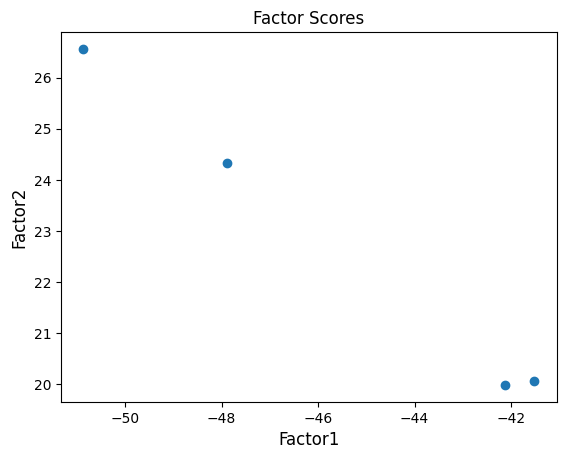

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

# 示例数据
X = np.array([[70.3, 23.7, 2.9, 3.1], [69.4, 23.8, 3.0, 3.8], [72.8, 20.9, 2.0, 4.3], [74.2, 19.0, 2.0, 4.8]])

# 执行因子分析
fa = FactorAnalyzer(rotation='varimax', n_factors=2, method='principal')
fa.fit(X)

# 获取因子载荷矩阵
A = fa.loadings_

# 计算因子得分
F = np.dot(X, A)  # 使用因子载荷矩阵与数据矩阵计算得分

# 可视化因子得分
plt.scatter(F[:, 0], F[:, 1])  # F[:, 0] 为第一个因子的得分，F[:, 1] 为第二个因子的得分
plt.xlabel('Factor1', fontsize=12)
plt.ylabel('Factor2', fontsize=12)
plt.title('Factor Scores')
plt.show()



因子得分的分布：如果散点图显示出明显的聚类，意味着样本在两个因子上的得分具有相似性，这可能表明样本在这两个因子上的表现比较一致。相反，如果散点图中的点分布较为分散，说明样本在因子上的得分差异较大，可能反映出不同样本之间的特征差异。

因子载荷：因子载荷矩阵（fa.loadings_）描述了原始变量和因子之间的关系。加载矩阵的值较大，表示该变量在该因子上有较大的权重，反之则权重较小。可以根据因子载荷判断每个因子代表的具体含义。

In [18]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 输入数据
X = np.array([[24.8, -2.0], [24.1, -2.4], [26.6, -3.0], [23.5, -1.9], [25.5, -2.1], 
              [27.4, -3.1], [22.1, -0.7], [21.6, -1.4], [22, -0.8], [22.8, -1.6], 
              [22.7, -1.5], [21.5, -1.0], [22.1, -1.2], [21.4, -1.3]])
y = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2])

# 创建LDA模型
LDA = LinearDiscriminantAnalysis()

# 训练LDA模型
LDA.fit(X, y)

# 输出LDA模型的各项参数
print("Means of each class:")
print(LDA.means_)  # 每个类别的均值

print("Covariance matrix:")
# print(LDA.covariance_)  # 类别间的协方差矩阵

print("Coefficients of the linear discriminants:")
print(LDA.coef_)  # 线性判别函数的系数

print("Intercepts of the linear discriminants:")
print(LDA.intercept_)  # 判别函数的截距

# 预测
print("Predictions on X:")
print(LDA.predict(X))  # 给出X的分类结果

# 模型准确率
print("Model accuracy on X:")
print(LDA.score(X, y))  # 给出准确率


Means of each class:
[[25.31666667 -2.41666667]
 [22.025      -1.1875    ]]
Covariance matrix:
Coefficients of the linear discriminants:
[[-2.08934247  3.3165165 ]]
Intercepts of the linear discriminants:
[55.72079847]
Predictions on X:
[1 1 1 2 1 1 2 2 2 2 2 2 2 2]
Model accuracy on X:
0.9285714285714286


线性判别分析 (LDA) 模型的输出进行详细的分析  
LDA 会根据每个类别计算特征的均值。这些均值表示了每个类别在数据中的中心位置，即每个类别样本的特征平均值。  
 
对于类别 1（均值 [25.3167, -2.4167]），这个类别的样本在特征 1 上的平均值为 25.3167，特征 2 上的平均值为 -2.4167。  
对于类别 2（均值 [22.025, -1.1875]），这个类别的样本在特征 1 上的平均值为 22.025，特征 2 上的平均值为 -1.1875。  
这些均值是 LDA 判别的基础，它们帮助 LDA 找到最佳的线性边界。  
[[-2.08934247, 3.3165165]]  
 这是 LDA 模型的关键输出，它表示了用于区分不同类别的线性判别函数的系数。系数反映了每个特征在类别区分中起到的作用：  
特征 1 的系数为 -2.08934247。  
特征 2 的系数为 3.3165165。  
[55.72079847]
截距是线性判别函数中的常数项，它在确定类别边界时发挥作用。它会影响决策边界的位置，决定了不同类别的判定阈值。  
[1 1 1 2 1 1 2 2 2 2 2 2 2 2]
LDA 模型根据训练数据 X 对样本进行预测。结果表示了每个样本所属的类别（1 或 2）。例如，前 3 个样本被预测为类别 1，接下来的样本被预测为类别 2，依此类推。  
0.9285714285714286  
这是 LDA 模型在训练数据集 X 上的准确率，约为 92.86%。这个值表示模型在训练数据集上正  
确分类的样本比例。较高的准确率表明模型能够较好地将不同类别的样本分开，但需要注意的  
是，准确率较高也可能是因为训练数据本身具有较好的区分度，或者模型过拟合训练集。
类别均值：LDA 用于寻找每个类别在各个特征上的中心位置。
系数：特征的系数反映了每个特征对区分类别的重要性，LDA 利用这些系数构建决策边界。
准确率：92.86% 的准确率表明模型表现较好，但仍需注意是否存在过拟合现象，最好在测试集上验证模型性能。  






In [8]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train=np.array([[52.89,25.47,15.46,6.66,5.30],[64.59,27.57,19.63,11.27,6.12],
[102.59,44.35,32,18.83,7.41],[139.12,63.48,44.44,17.47,13.73],
[160.69,73.32,54.15,18.40,14.82],[189.26,89.41,57.16,24.55,18.14],
[225.61,106.56,65.59,33.95,19.51],[268.25,114.22,87.90,36.06,30.07],
[302.36,136.02,96.86,38,31.48],[348.63,155.01,109.66,48.55,35.41],
[408.86,189.97,127.12,42.74,49.03],[438.6,189.9,151.92,47.28,49.5],
[543.85,272.8,168.06,52.89,50.1],[575.62,277.22,189.03,61.52,47.85],
[975.54,416.64,300.79,111.06,147.05],[1095.34,483.98,335.93,95.90,179.53],
[1334.91,609.69,389.14,112.5,223.58],[1688.5,779.94,483.36,134.4,290.80]])
y_train = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2])

X_test=np.array([[703.26,359.64,223.08,63.37,57.17],[816.22,398.6,269.85,69.99,77.78]])
LDA =LinearDiscriminantAnalysis(store_covariance=True)
LDA.fit(X_train, y_train)
print('mean:')
print(LDA.means_)
print('cov:')
print(LDA.covariance_)
print('decision:')
print(LDA.coef_)
print(LDA.intercept_)
print('predict:')
print(LDA.score(X_train,y_train))
print('test results:')
print(LDA.predict(X_test))

mean:
[[ 272.92285714  126.09285714   87.07         32.72642857   27.03357143]
 [1273.5725      572.5625      377.305       113.465       210.24      ]]
cov:
[[37481.10472004 18486.0914256  11000.10396944  2700.63051071
   5294.27881429]
 [18486.0914256   9171.02413115  5390.58866944  1302.49396627
   2621.98465873]
 [11000.10396944  5390.58866944  3293.98035      825.7967
   1489.73825   ]
 [ 2700.63051071  1302.49396627   825.7967       246.1027123
    326.23713214]
 [ 5294.27881429  2621.98465873  1489.73825      326.23713214
    856.31877341]]
decision:
[[-0.04560755 -0.38763326  0.26807676  0.73352452  0.9132237 ]]
[-54.77929526]
predict:
1.0
test results:
[1 1]


类别 1 的均值为 [272.92, 126.09, 87.07, 32.73, 27.03]，意味着在类别 1 中，每个特征的平均值大约是这些数值。  
类别 2 的均值为 [1273.57, 572.56, 377.31, 113.47, 210.24]，表示类别 2 的样本在特征上的分布中心。  

这个矩阵是类别 1 和类别 2 的 协方差矩阵，它描述了每个特征之间的线性关系（协方差）。  
例如，第一个元素 37481.1 表示特征 1 和特征 1 之间的协方差。  
值较大的协方差（如 37481.1）说明这些特征的变化是相关的。  
例如，18486.1 是特征 1 和特征 2 之间的协方差，表明这两个特征之间存在一定的线性关  系。  
LDA 假设所有类别的协方差矩阵是相同的，因此这个协方差矩阵是基于类别之间的总数据估计出来的。  

LDA.coef_ 输出了判别函数的系数，表示每个特征对类别划分的贡献。该数组中的每个系数对应一个特征：  

[-0.04560755, -0.38763326, 0.26807676, 0.73352452, 0.9132237] 是 5 个特征的系数。  
系数的符号和大小决定了特征对判别结果的影响。例如，特征 4 和特征 5 的系数较大（0.  73352452 和 0.9132237），意味着这两个特征在分类中起到重要作用。  
LDA.intercept_ 输出的是判别函数的截距项（偏移量），其值为 [-54.77929526]，用于调整分类边界的位置。  

类别均值：通过类别均值可以看出，类别 2 的样本在所有特征上的值都显著高于类别 1，说明类别 1 和类别 2 之间的特征值差异较大。  
协方差矩阵：类别 1 和类别 2 的协方差矩阵告诉我们特征之间的关系。较大的协方差值表示特征之间的关系较强。  
判别系数和截距：LDA 利用这些系数来确定如何通过特征值划分数据点。正负系数的变化决定了哪个类别被赋予某个样本。  
准确率和预测：训练集准确率表明模型在训练集上表现良好，且对新样本（测试集）的预测也是一致的。  

In [9]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

# 训练数据集（特征和标签）
X_train = np.array([
    [6.0, -11.5, 19, 90], [-11.0, -18.5, 25, -36],
    [90.2, -17.0, 17, 3], [-4.0, -15.0, 13, 54],
    [0.0, -14.0, 20, 35], [7.1, -10.5, 18, 70],
    [12.3, -8.7, 15, 80], [8.4, -13.0, 22, 60],
    [4.0, -16.0, 20, 40], [5.0, -12.0, 18, 50],
    [9.2, -10.0, 19, 45], [11.3, -14.5, 16, 55],
    [8.5, -9.8, 20, 65], [6.2, -11.0, 17, 50],
    [13.0, -8.0, 21, 85], [10.5, -12.5, 23, 60],
    [9.0, -10.0, 18, 75], [11.0, -13.0, 22, 80]
])

y_train = np.array([1, 3, 2, 1, 2, 3, 3, 1, 3, 1, 2, 2, 1, 1, 1, 3, 3, 1])

# 初始化高斯朴素贝叶斯分类器
gnb = GaussianNB()

# 使用训练数据拟合模型
gnb.fit(X_train, y_train)

# 预测训练数据集的分类结果
train_predictions = gnb.predict(X_train)
print(f"预测的分类结果: {train_predictions}")

# 计算并输出分类准确率
train_accuracy = gnb.score(X_train, y_train)
print(f"训练集分类准确率: {train_accuracy:.4f}")

# 输出每个类别的先验概率
class_prior = gnb.class_prior_
print(f"每一类的先验概率: {class_prior}")

# 输出每个类别的样本数量
class_count = gnb.class_count_
print(f"每一类的样本数量: {class_count}")

# 输出每个类别每个特征的方差（使用 var_）
var = gnb.var_
print(f"每一类每个特征的方差: \n{var}")

# 输出每个类别每个特征的均值
theta = gnb.theta_
print(f"每一类每个特征的均值: \n{theta}")

# 输出每个样本在各个类别下的预测概率
prediction_proba = gnb.predict_proba(X_train)
print(f"每个样本的预测概率: \n{prediction_proba}")


预测的分类结果: [1 3 2 3 3 1 1 1 3 1 1 1 1 1 1 1 1 1]
训练集分类准确率: 0.5556
每一类的先验概率: [0.44444444 0.22222222 0.33333333]
每一类的样本数量: [8. 4. 6.]
每一类每个特征的方差: 
[[  22.79984463    4.02234463    8.00000088  227.68750088]
 [1321.18687588    6.29687588    2.50000088  380.75000088]
 [  60.05805644   12.11666755   11.13888977 1583.4722231 ]]
每一类每个特征的均值: 
[[  6.7625     -11.6625      19.          66.75      ]
 [ 27.675      -13.875       18.          34.5       ]
 [  5.31666667 -12.7         19.83333333  48.16666667]]
每个样本的预测概率: 
[[8.68771093e-01 1.61123704e-03 1.29617670e-01]
 [3.55033611e-13 8.16430732e-06 9.99991836e-01]
 [8.78449158e-70 1.00000000e+00 7.66388702e-26]
 [2.55435140e-01 3.22239294e-02 7.12340931e-01]
 [1.85202547e-01 2.36462529e-01 5.78334923e-01]
 [9.33352705e-01 5.77082365e-03 6.08764710e-02]
 [8.49792353e-01 1.71055032e-03 1.48497097e-01]
 [8.62457246e-01 2.28346796e-03 1.35259286e-01]
 [1.84592993e-01 2.05435132e-01 6.09971875e-01]
 [8.16579864e-01 5.76431098e-02 1.25777027e-01]
 [7.6494

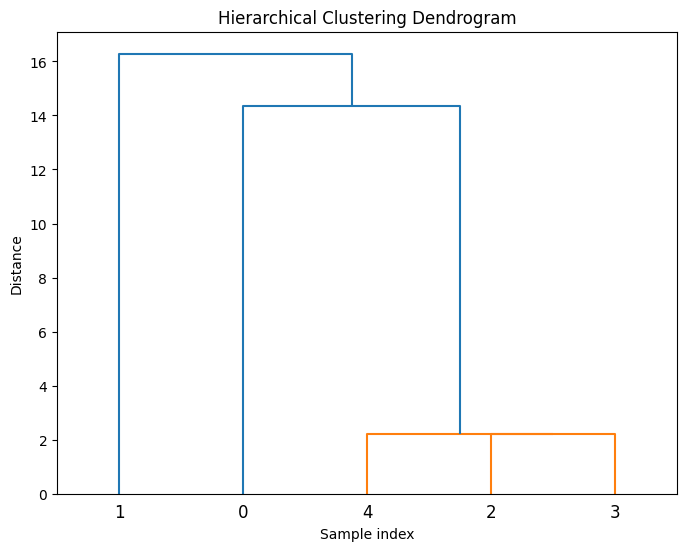

[[ 2.          3.          2.2032703   2.        ]
 [ 4.          5.          2.21585198  3.        ]
 [ 0.          6.         14.35228205  4.        ]
 [ 1.          7.         16.28404434  5.        ]]


In [23]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

data = np.array([[7.90, 39.77, 8.49, 1.94, 19.27, 11.05, 2.04, 13.29],
                 [7.68, 50.37, 11.35, 13.30, 19.25, 14.59, 2.75, 14.87],
                 [9.42, 27.93, 8.20, 8.14, 16.17, 9.42, 1.55, 9.76],
                 [9.16, 27.98, 9.01, 9.32, 15.99, 9.10, 1.82, 11.35],
                 [10.06, 28.64, 10.52, 10.05, 16.18, 8.39, 1.96, 10.81]])

z = linkage(data, method='single', metric='euclidean')

# 绘制聚类树
plt.figure(figsize=(8, 6))
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

print(z)  # 输出聚类的结果


样本 0 和样本 1 在距离 6.21 时被合并；  
样本 2 和样本 4 在距离 6.74 时被合并，以此类推。  

聚类结果:
 [[ 0.  1.  0.  2.]
 [11. 20.  0.  2.]
 [22. 41.  0.  3.]
 [23. 42.  0.  4.]
 [27. 43.  0.  5.]
 [ 3.  4.  0.  2.]
 [ 5. 45.  0.  3.]
 [ 6. 46.  0.  4.]
 [13. 47.  0.  5.]
 [14. 48.  0.  6.]
 [15. 49.  0.  7.]
 [19. 50.  0.  8.]
 [21. 51.  0.  9.]
 [24. 52.  0. 10.]
 [ 2.  7.  0.  2.]
 [16. 54.  0.  3.]
 [34. 55.  0.  4.]
 [35. 56.  0.  5.]
 [36. 57.  0.  6.]
 [17. 25.  0.  2.]
 [32. 59.  0.  3.]
 [37. 60.  0.  4.]
 [ 8.  9.  0.  2.]
 [18. 62.  0.  3.]
 [26. 63.  0.  4.]
 [28. 64.  0.  5.]
 [29. 65.  0.  6.]
 [30. 66.  0.  7.]
 [33. 67.  0.  8.]
 [38. 68.  0.  9.]
 [39. 69.  0. 10.]
 [10. 40.  1.  3.]
 [12. 44.  1.  6.]
 [53. 72.  1. 16.]
 [58. 73.  1. 22.]
 [61. 74.  1. 26.]
 [70. 75.  1. 36.]
 [31. 76.  1. 37.]
 [71. 77.  2. 40.]]


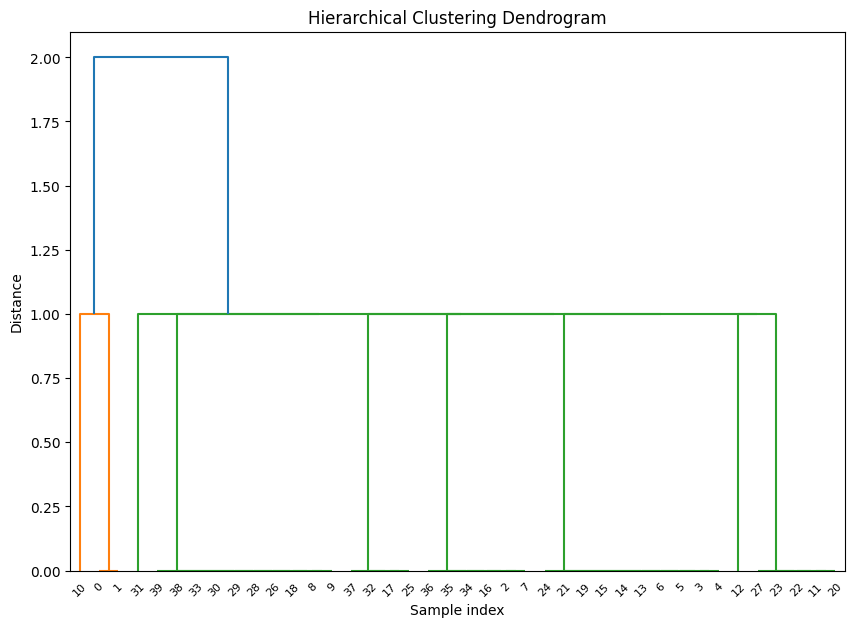

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# 将数据重塑为合适的格式 (这里将其视作10个样本，每个样本有1个特征)
data = np.array([[2], [2], [7], [6], [6], [6], [6], [7], [9], [9], 
                 [1], [5], [4], [6], [6], [6], [7], [8], [9], [6], 
                 [5], [6], [5], [5], [6], [8], [9], [5], [9], [9], 
                 [9], [10], [8], [9], [7], [7], [7], [8], [9], [9]])

# 执行层次聚类，计算距离
z = linkage(data, method='single', metric='euclidean')

# 打印聚类结果，输出每一步的合并情况
print("聚类结果:\n", z)

# 绘制聚类树状图
plt.figure(figsize=(10, 7))
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


  第一行：
[ 0. 1. 0. 2.]  

索引为 0 和 1 的两个簇合并，合并的距离为 0，合并后新簇的大小为 2（因为原来这两个簇分别只有 1 个样本）。  
第二行：  
[11. 20. 0. 2.]  

索引为 11 和 20 的两个簇合并，合并的距离为 0，合并后的新簇大小为 2。  

Labels:  [1 0 0 0 0 0 0 1 1 1 1 2 2 2 2 2]
Cluster Centers:  [[ 3.83333333  3.        ]
 [-3.          2.4       ]
 [-0.2        -1.2       ]]


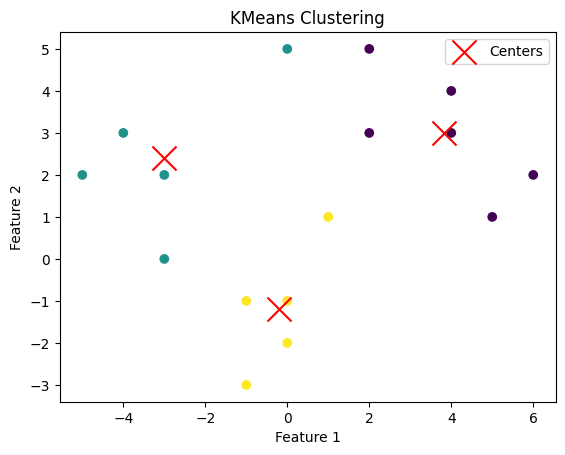

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

K = 3
center = np.array([[4, 3], [-3, 2], [0, -1]])  # 初始聚点
data = np.array([[0, 5], [2, 3], [2, 5], [4, 4], [4, 3], [5, 1], [6, 2], [-4, 3],
                 [-3, 2], [-3, 0], [-5, 2], [1, 1], [0, -1], [0, -2], [-1, -1], [-1, -3]])

# 聚类
kc = KMeans(n_clusters=K, init=center, n_init=1).fit(data)

# 聚类结果
print("Labels: ", kc.labels_)  # 每个点的聚类标签
print("Cluster Centers: ", kc.cluster_centers_)  # 聚类中心

# 绘图
plt.scatter(data[:, 0], data[:, 1], c=kc.labels_, cmap='viridis', marker='o')
plt.scatter(kc.cluster_centers_[:, 0], kc.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centers')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


这表示：  

数据点的聚类标签依次是 [1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2]。  
聚类中心的位置是 [4, 3]，[-3, 2] 和 [0, -1]，分别对应 3 个簇的中心。  

In [12]:
from sklearn.cluster import KMeans
import numpy as np

# 设置聚类数量
K = 3

# 示例数据
data = np.array([[0, 5], [2, 3], [2, 5], [4, 4], [4, 3], [5, 1], [6, 2], [-4, 3],
                 [-3, 2], [-3, 0], [-5, 2], [1, 1], [0, -1], [0, -2], [-1, -1], [-1, -3]])

# 使用随机初始化聚类中心
kc = KMeans(n_clusters=K, init='random').fit(data)
print("Labels with random init: ", kc.labels_)  # 聚类标签
print("Cluster centers with random init: ", kc.cluster_centers_)  # 聚类中心

# 使用kmeans++初始化聚类中心
kc = KMeans(n_clusters=K, init='kmeans++').fit(data)
print("Labels with kmeans++ init: ", kc.labels_)  # 聚类标签
print("Cluster centers with kmeans++ init: ", kc.cluster_centers_)  # 聚类中心


Labels with random init:  [1 1 1 1 1 1 1 2 2 2 2 1 0 0 0 0]
Cluster centers with random init:  [[-0.5  -1.75]
 [ 3.    3.  ]
 [-3.75  1.75]]


InvalidParameterError: The 'init' parameter of KMeans must be a str among {'random', 'k-means++'}, a callable or an array-like. Got 'kmeans++' instead.

Labels with random init:  [1 1 1 1 1 1 1 2 2 2 2 1 0 0 0 0]  
Cluster centers with random init:  [[-0.5  -1.75]  
 [ 3.    3.  ]  
 [-3.75  1.75]]  
 [0,5]属于1  
 [2,3]属于1  
 三个聚类的中心分别是[[-0.5  -1.75]    
 [ 3.    3.  ]    
 [-3.75  1.75]]    